# Adaptive Thresholding Testing

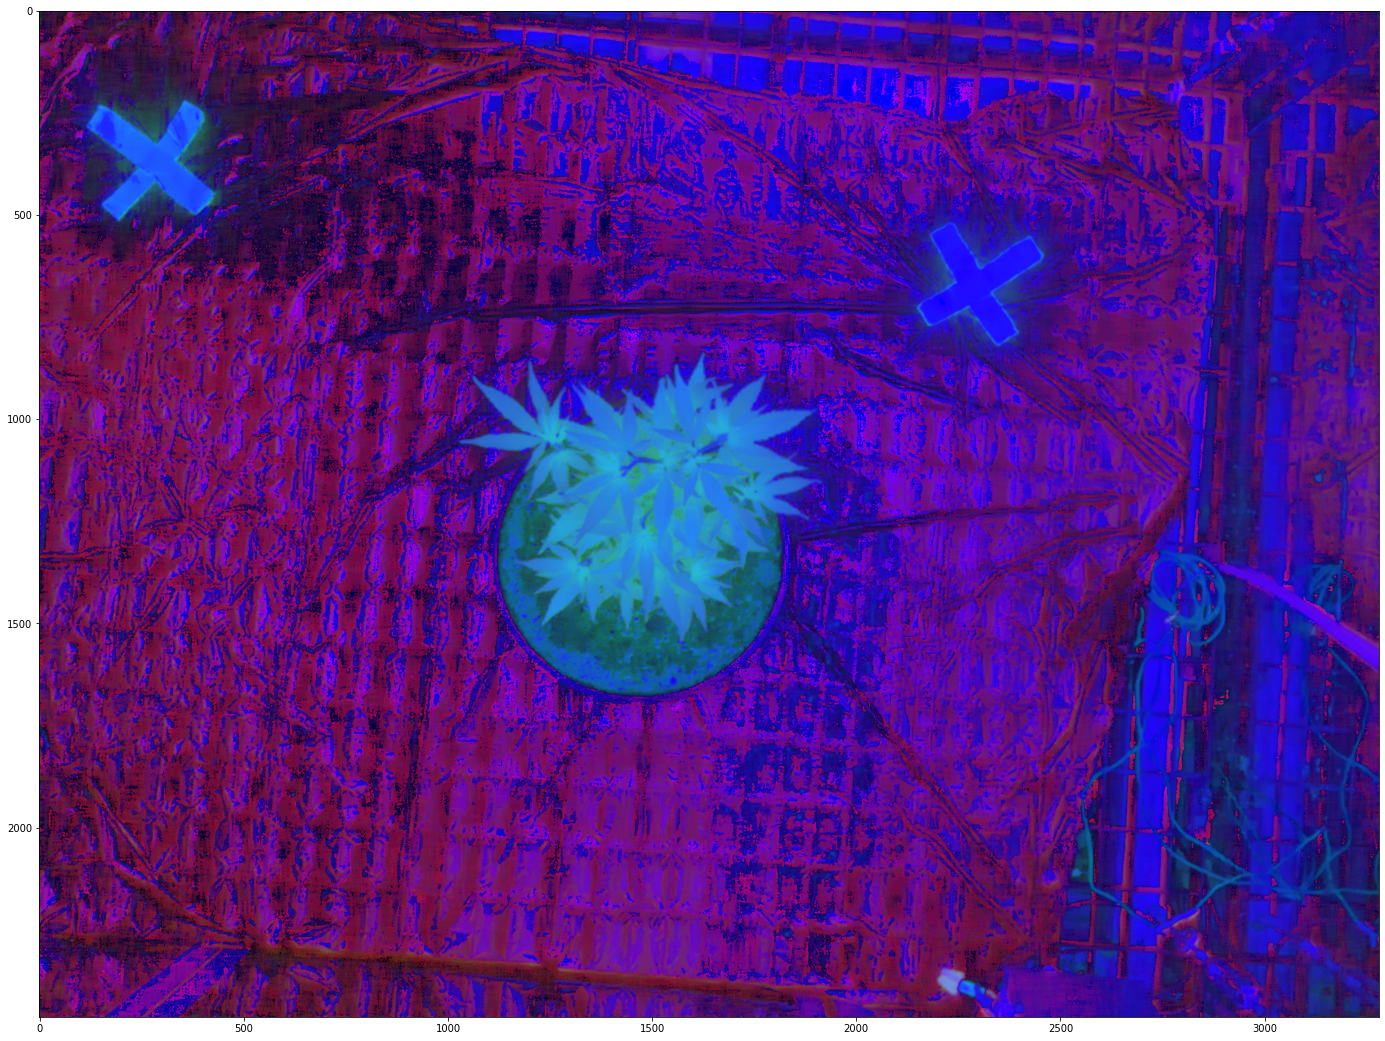

In [79]:
import os
import cv2 as cv
import numpy as np
from matplotlib import pyplot

%matplotlib inline
pyplot.rcParams['figure.figsize'] = [24, 20]

os.chdir("C:/Users/Admin/Downloads")
image = cv.cvtColor(cv.imread("./img3.png"), cv.COLOR_BGR2HSV)
pyplot.imshow(image)

## Filtering

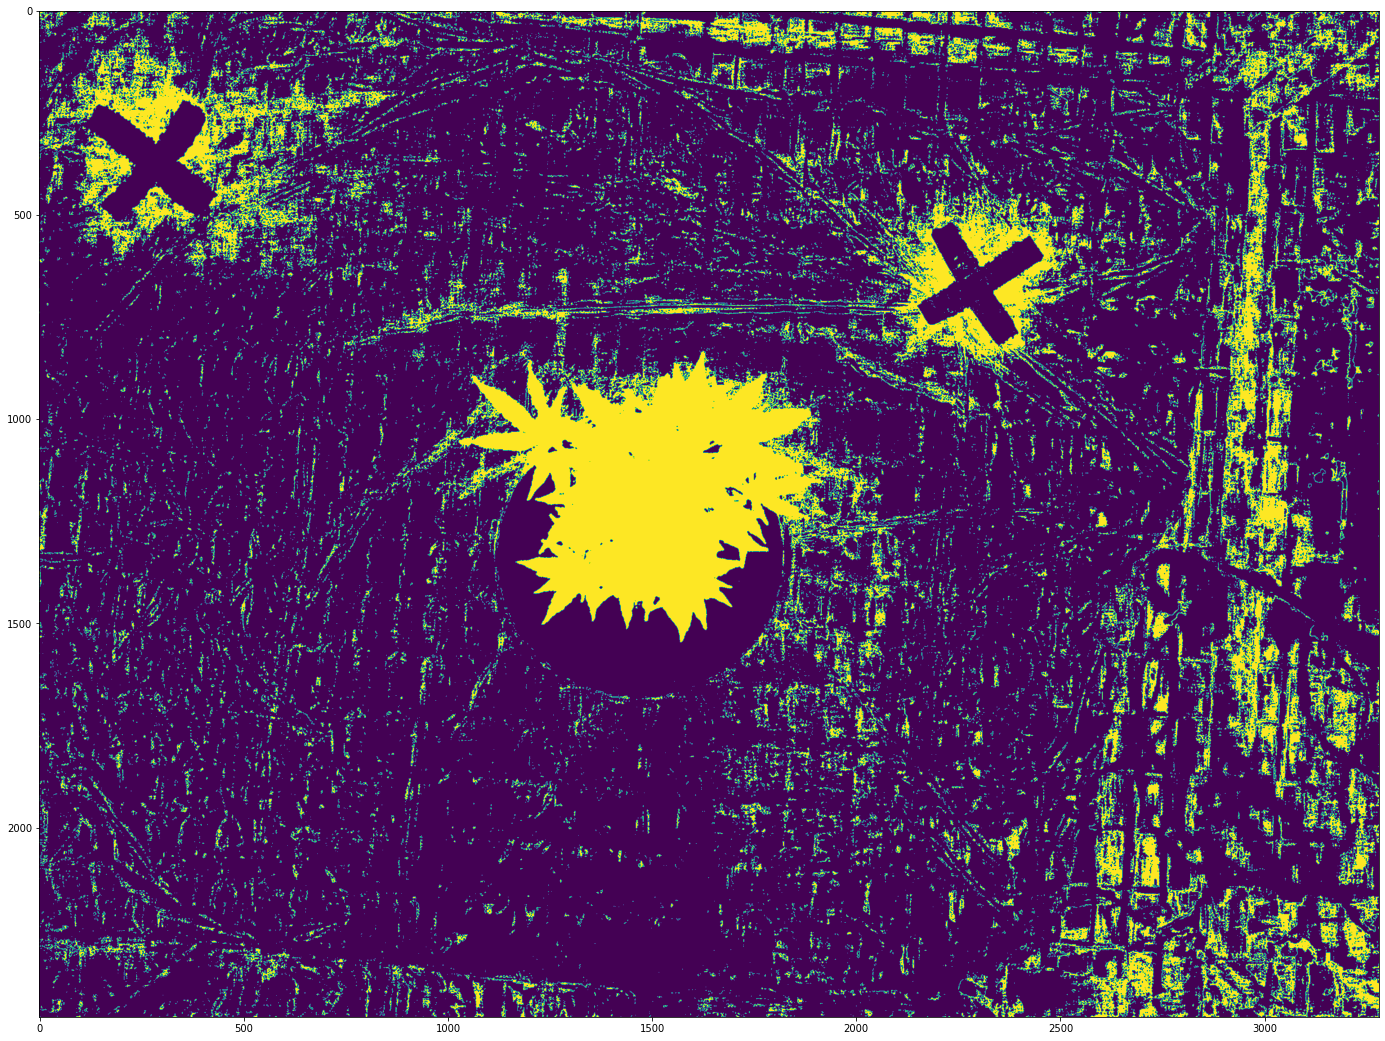

In [80]:
(imageH, _, _) = cv.split(image)
minLimit = 35
maxLimit = 50
imageH = cv.inRange(imageH, minLimit, maxLimit)
pyplot.imshow(imageH)

In [81]:
pixelCount = np.sum(imageH != 0)
print(pixelCount)

1362936


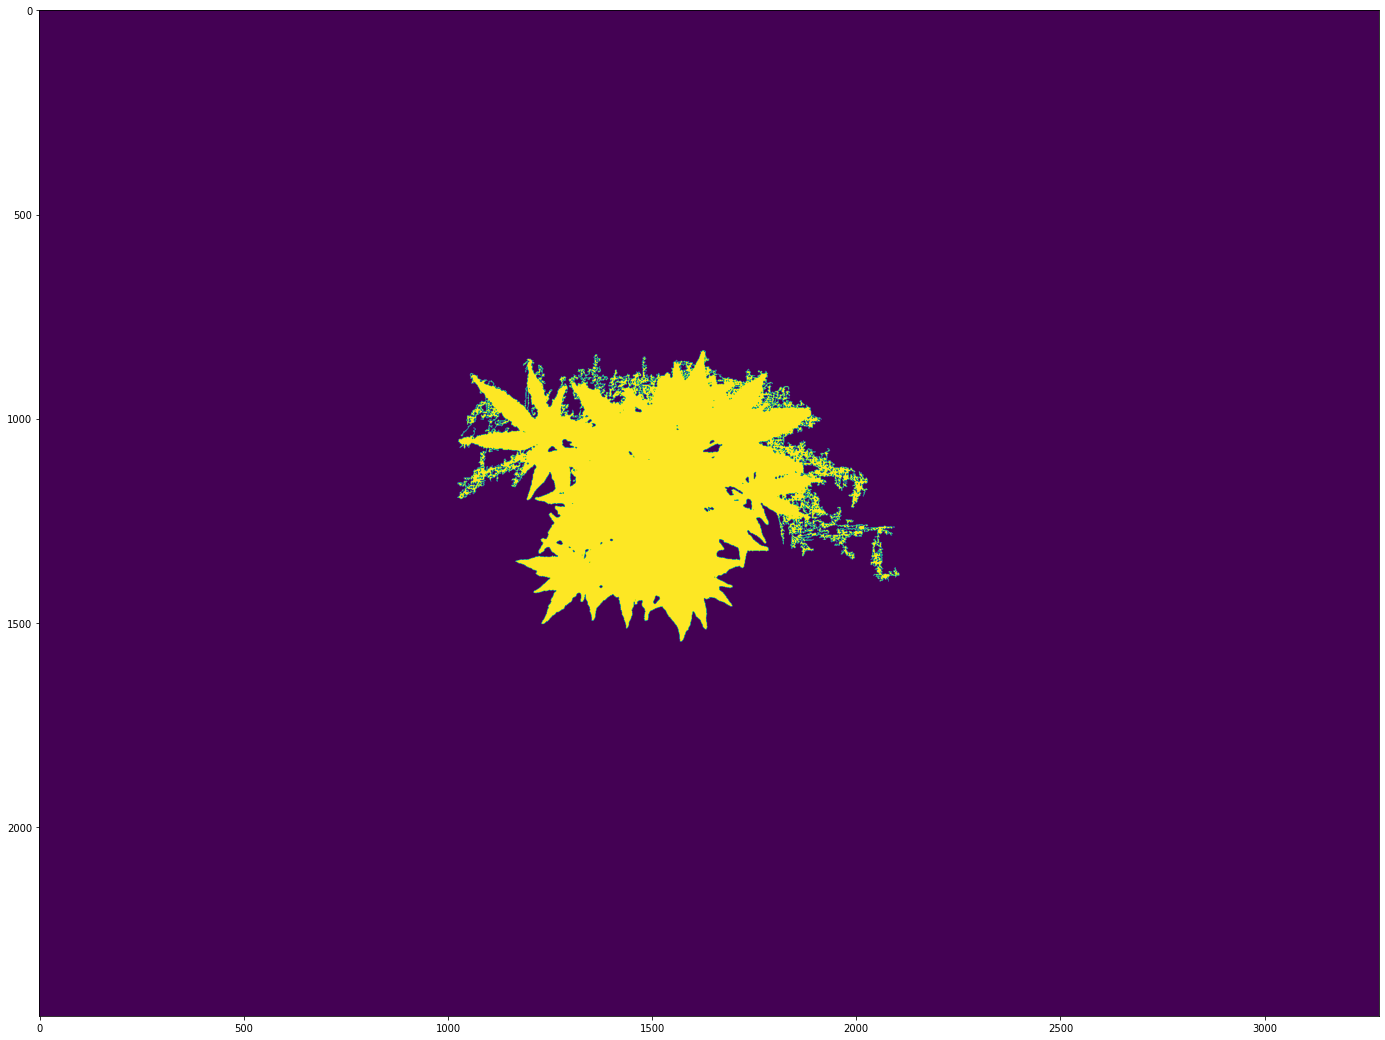

In [82]:
(_, elementLabels, elementStats, _) = cv.connectedComponentsWithStats(imageH, 8)
elementLabels = elementLabels[1:]
elementStats = elementStats[1:]
biggestElementLocation = np.where(elementStats[1:, 4] == max(elementStats[1:, 4]))[0][0] + 2
elementLabels[elementLabels != biggestElementLocation] = 0
elementLabels = elementLabels/biggestElementLocation
interestingPixels = np.sum(elementLabels != 0)
pyplot.imshow(elementLabels)

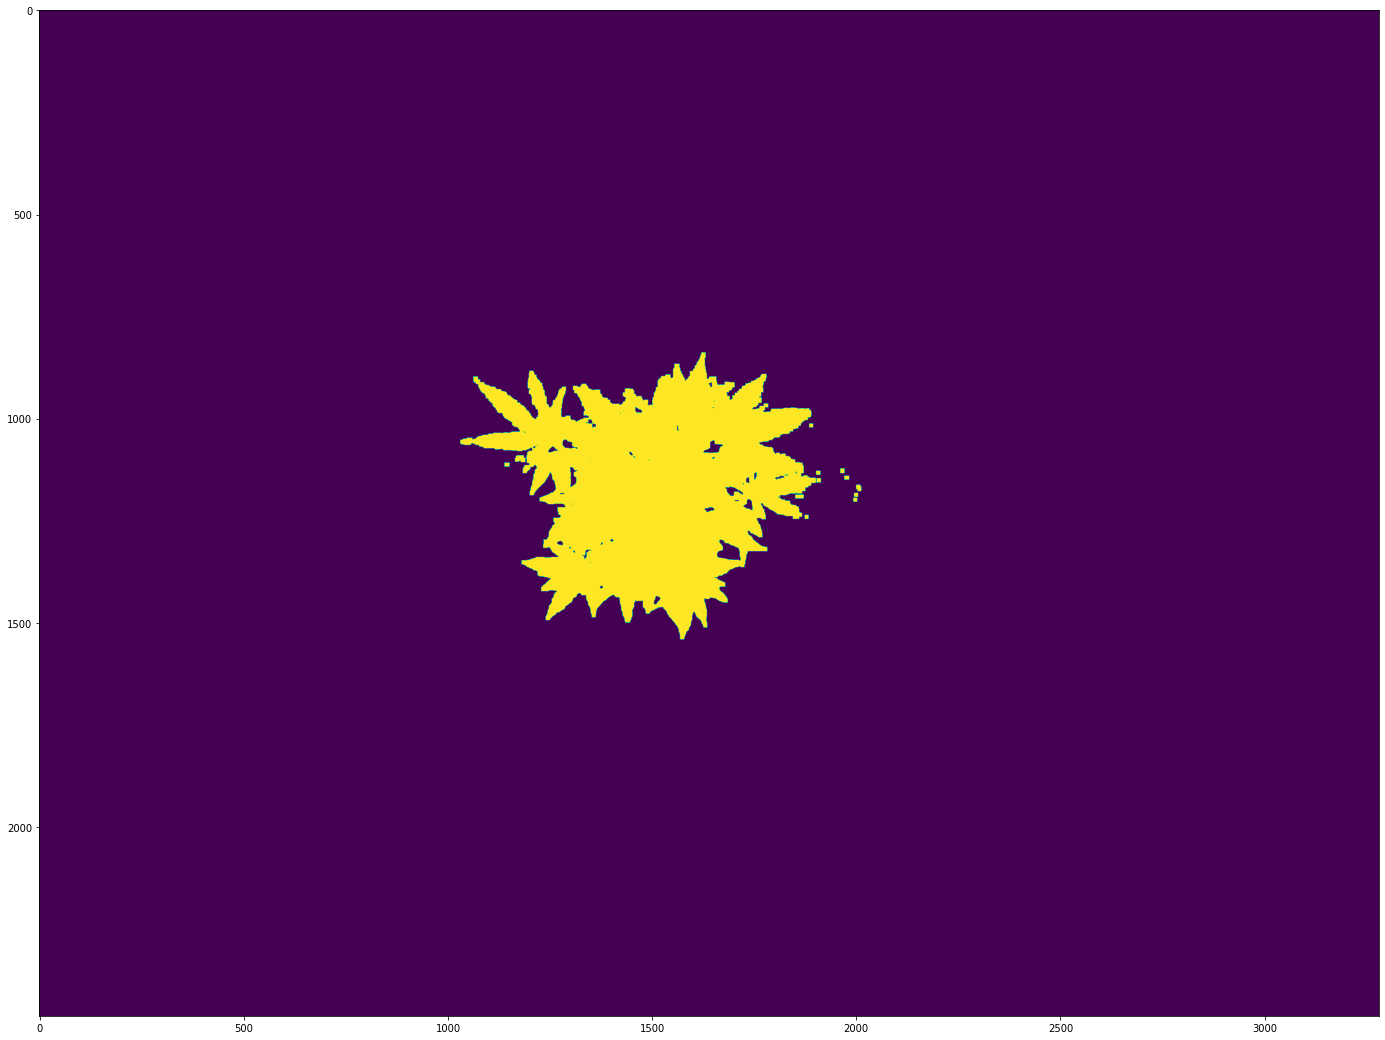

In [83]:
kernel = np.ones((10,10), np.uint8)
elementLabels = cv.dilate(cv.erode(elementLabels, kernel), kernel)
pyplot.imshow(elementLabels)